# Omar Atef Sesa 
### Data Science and Business Analytics

### Explore Supervised Machine Learning

In [2]:
# importing libraries:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn import metrics  
%matplotlib inline

In [3]:
# importing the data:
url = "http://bit.ly/w-data"
df= pd.read_csv(url)
print("Data imported successfully")

df.sample(10)

Data imported successfully


,Hours,Scores
8,8.3,81
6,9.2,88
2,3.2,27
20,2.7,30
19,7.4,69
24,7.8,86
7,5.5,60
18,6.1,67
14,1.1,17
11,5.9,62


## Data Preprocessing:

In [4]:
#describe the data:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#Summary information and data types:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [6]:
# explor null values:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Exploring the Dataset:

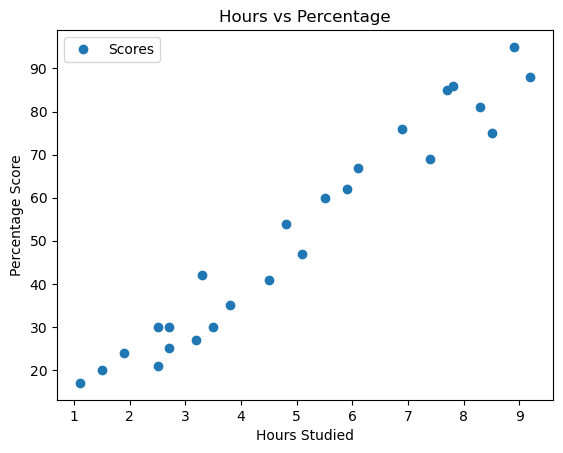

In [10]:
# Plotting the distribution of scores:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### Note:
**A positive linear relationship is evident between the number of hours devoted to studying and the corresponding percentage of scores attained.**

##  Dataset Preparing:

### Spliting the Dataset into Variables:

In [15]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

In [17]:
regressor = LinearRegression()

In [18]:
regressor.fit(X_train, y_train) 

LinearRegression()

In [19]:
print("Coefficent percentage.",regressor.score(X_test,y_test)*100 )

Coefficent percentage. 94.54906892105356


### Predict Score if a student studies for 9.25 hrs/day : 

In [21]:
y_prediction = regressor.predict(X_test)
y_prediction

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [22]:
df2=pd.DataFrame({'Actual':y_test,'Prediction':y_prediction})
df2

,Actual,Prediction
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Regression line: 

In [23]:
coefficient= regressor.coef_
intercent = regressor.intercept_
line= (df['Hours'].values*coefficient) + intercent

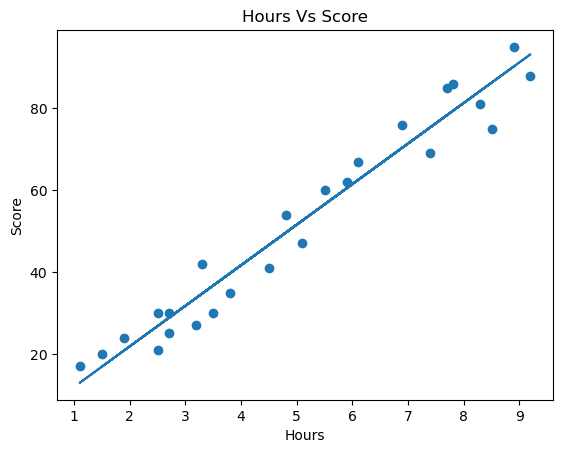

In [24]:
# plotting the regression line:
plt.scatter(X,y)
plt.title('Hours Vs Score')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.plot(X,line)
plt.show()

### Prediction Score if a student study for 9.25 hrs/day:

In [25]:
score_pred= regressor.predict([[9.25]])
float(score_pred)

93.69173248737538

### The model Evaluation :

In [26]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_prediction)) 

Mean Absolute Error: 4.183859899002975
